In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


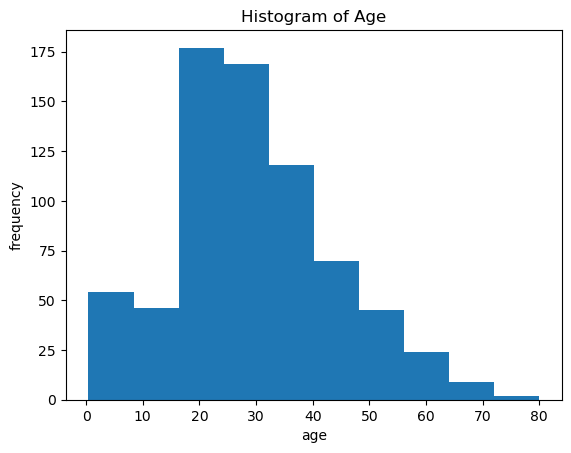

In [10]:
#histogram
plt.hist(df['age'],bins=10)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Histogram of Age')
plt.savefig('histplot.png')
plt.show()

In [ ]:
# The histogram reveals a right-skewed distribution, where the majority of individuals are between 
# 18 and 40 years old, and frequencies gradually decrease at higher ages.

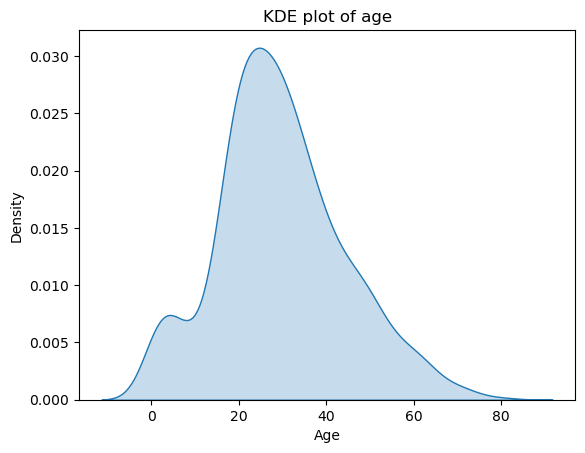

In [29]:
#kde
plt.figure()
sns.kdeplot(df['age'],fill=True)
plt.xlabel('Age')
plt.title('KDE plot of age')
plt.savefig('kdeplot.png')
plt.show()

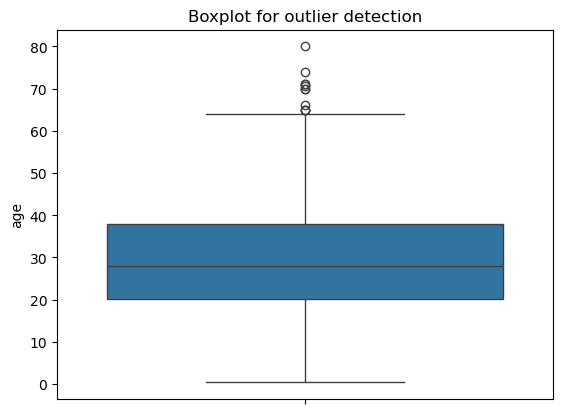

In [13]:
#boxplot
plt.figure()
sns.boxplot(y=df['age'])
plt.title('Boxplot for outlier detection')
plt.savefig('boxplot.png')
plt.show()

In [ ]:
# The boxplot shows that most ages fall within a narrow range around the late 20s, with a few higher-age values identified as outliers.

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


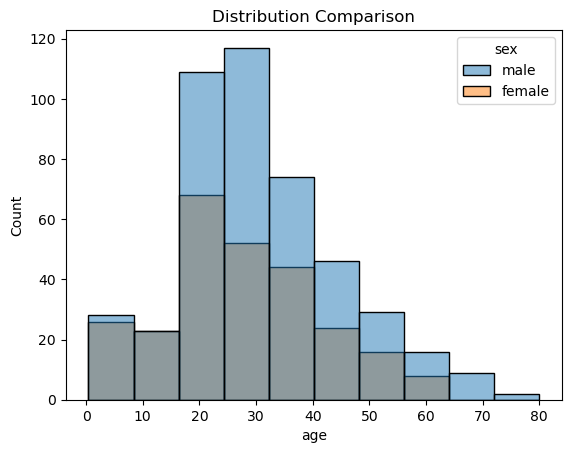

In [20]:
#distribution comparison
plt.figure()
sns.histplot(data=df, x='age', hue='sex', bins=10)
plt.title('Distribution Comparison')
plt.savefig('comp.png')
plt.show()

In [ ]:
# Both male and female age distributions are similar in shape but males show a slightly wider spread and higher maximum ages 
# indicating greater variability compared to females.

In [21]:
#skewness
df['age'].skew()

np.float64(0.38910778230082704)

In [22]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [28]:
#outlier detection
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
IQR=q3-q1

outliers=df[(df['age']<q1-1.5 * IQR) | (df['age'] > q3 +1.5 * IQR)]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


#### The age data shows a right-skewed distribution, with most individuals concentrated in the young to middle-age range. A small number of older age values act as outliers, as seen in the boxplot, which slightly increase the overall spread and skewness. Group-wise comparison indicates that both males and females follow a similar distribution pattern, though males display a wider spread and higher maximum ages, suggesting greater variability. Overall, the dataset exhibits moderate dispersion with a few influential high-age outliers, which should be considered during further statistical analysis or modeling.